In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
data_mb = []

for year in range(2012,2022):
    from_csv = pd.read_csv(f'./data_mb_all_years/{year}.csv')
    df = pd.DataFrame()
    
    # Var names are inconsistent
    nefashot = 'nefashot' if 'nefashot' in from_csv.columns else 'Nefashot'
    mispar_mb = 'misparmb' if 'misparmb' in from_csv.columns else 'MisparMb'
    total_net = 'total_net' if 'total_net' in from_csv.columns else 'Total_Net'
    decile = 'decile' if 'decile' in from_csv.columns else 'Decile'
    periferia = 'madadpereferia' if 'madadpereferia' in from_csv.columns else 'MadadPereferia'
    
    df['mispar_mb'] = from_csv[mispar_mb].astype(str) + '_' + str(year) # מספר משק בית כולל שנת דוח
    df['year'] = year # שנת חקירה
    df['decile'] = from_csv[decile] # עשירון
    df['periferia_index'] = from_csv[periferia] # מדד פריפריה
    df['nefashot'] = from_csv[nefashot] # נפשות במשק
    df['total_neto'] = from_csv[total_net] # הכנסה כוללת נטו
    df['fruits_vegtables'] = from_csv['c31'] # הוצאה על פירות וירקות
    
    data_mb.append(df)

In [312]:
test = pd.read_csv(f'./data_mb_all_years/2016.csv')
test = test.loc[:, test.columns.intersection(['i1kaspit'])]
test.sort_values('i1kaspit', ascending=False).head(12)

,i1kaspit
7470,212097
3325,212097
822,212097
3577,212097
8300,212097
6810,212097
5080,212097
8019,212097
7639,212097
7288,212097


In [224]:
mb_df = pd.concat(data_mb)
mb_df

,mispar_mb,year,decile,periferia_index,nefashot,total_neto,fruits_vegtables
0,240_2012,2012,3,1.0,3,8873,533.0
1,257_2012,2012,4,1.0,1,5111,714.0
2,265_2012,2012,7,1.0,2,14144,797.0
3,273_2012,2012,1,1.0,2,2198,240.0
4,281_2012,2012,1,1.0,3,5873,243.0
...,...,...,...,...,...,...,...
6052,53760_2021,2021,10,3.0,6,60662,272.0
6053,53762_2021,2021,1,5.0,7,10443,34.0
6054,58002_2021,2021,1,4.0,3,6226,388.0
6055,58031_2021,2021,3,4.0,3,12082,316.0


In [225]:
data_food = []

for year in range(2012,2022):
    from_csv = pd.read_csv(f'./data_food_all_years/{year}.csv')
    df = pd.DataFrame()
    
    # Var names are inconsistent
    mispar_mb = 'misparmb' if 'misparmb' in from_csv.columns else 'MisparMB'
    
    df['mispar_mb'] = from_csv[mispar_mb].astype(str) + '_' + str(year) # מספר משק בית כולל שנת דוח
    df['food_no_fv'] = from_csv['c30'] # הוצאה על אוכל ללא פירות וירקות
    df['bread'] = from_csv['c300'] # הוצאה על לחמים,דגנים ובצקים
    df['oils'] = from_csv['c301'] # הוצאה על שמנים צמחיים
    df['meat_chicken'] = from_csv['c302'] # הוצאה על בשר ועופות
    df['fish'] = from_csv['c303'] # הוצאה על דגים
    df['milk_eggs'] = from_csv['c304'] # הוצאה על חלב,מוצריו,ביצים
    df['sugar'] = from_csv['c305'] # הוצאה על סוכרים
    df['soda'] = from_csv['c306'] # הוצאה על משקאות קלים
    df['alcohol'] = from_csv['c307'] # הוצאה על אלכוהול
    df['out'] = from_csv['c308'] # הוצאה על אוכל בחוץ
    df['others'] = from_csv['c309'] # הוצאה על מוצרים שונים

    data_food.append(df)

In [226]:
food_df = pd.concat(data_food)
food_df

,mispar_mb,food_no_fv,bread,oils,meat_chicken,fish,milk_eggs,sugar,soda,alcohol,out,others
0,42_2012,2267,361,0,425,26,395,57,75,0,477,451
1,59_2012,1688,304,15,394,89,199,320,132,0,0,235
2,67_2012,4512,721,79,933,240,1061,209,0,37,988,246
3,75_2012,1495,244,211,374,136,218,123,57,0,0,132
4,83_2012,5645,490,155,765,0,845,35,0,0,2957,397
...,...,...,...,...,...,...,...,...,...,...,...,...
6052,53760_2021,12599,0,0,0,0,0,0,0,0,0,12599
6053,53762_2021,2163,387,93,705,86,189,27,357,0,0,316
6054,58002_2021,2191,306,0,582,0,565,0,629,0,0,107
6055,58031_2021,966,505,0,0,256,0,84,0,0,0,119


In [227]:
big_df = pd.concat([mb_df.set_index('mispar_mb'), food_df.set_index('mispar_mb')], axis=1, join="inner")
big_df['total_food'] = big_df['fruits_vegtables'] + big_df['food_no_fv']
big_df

,year,decile,periferia_index,nefashot,total_neto,fruits_vegtables,food_no_fv,bread,oils,meat_chicken,fish,milk_eggs,sugar,soda,alcohol,out,others,total_food
mispar_mb,,,,,,,,,,,,,,,,,,
240_2012,2012,3,1.0,3,8873,533.0,2235,467,80,178,209,425,87,67,0,0,723,2768.0
257_2012,2012,4,1.0,1,5111,714.0,88,0,0,0,0,0,0,0,0,44,44,802.0
265_2012,2012,7,1.0,2,14144,797.0,1024,234,0,400,24,134,15,0,0,0,216,1821.0
273_2012,2012,1,1.0,2,2198,240.0,876,72,0,378,70,127,223,0,0,0,7,1116.0
281_2012,2012,1,1.0,3,5873,243.0,906,412,20,0,33,204,22,35,0,44,135,1149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53760_2021,2021,10,3.0,6,60662,272.0,12599,0,0,0,0,0,0,0,0,0,12599,12871.0
53762_2021,2021,1,5.0,7,10443,34.0,2163,387,93,705,86,189,27,357,0,0,316,2197.0
58002_2021,2021,1,4.0,3,6226,388.0,2191,306,0,582,0,565,0,629,0,0,107,2579.0


In [244]:
by_periferia = big_df.groupby(['periferia_index']).mean()

index_to_strs = ['Very Periferia','Periferia','Medium','Central','Very Central']

by_periferia.set_axis(index_to_strs, axis='index')

by_periferia

,year,decile,nefashot,total_neto,fruits_vegtables,food_no_fv,bread,oils,meat_chicken,fish,milk_eggs,sugar,soda,alcohol,out,others,total_food
periferia_index,,,,,,,,,,,,,,,,,
1.0,2015.352338,4.814899,3.194223,15634.681870,500.452118,1954.713417,339.210946,57.098822,383.076017,99.628278,310.859369,83.337894,77.190802,62.360319,333.472064,208.132649,2459.211370
2.0,2016.791146,4.477765,3.714413,16675.866190,612.142332,2356.669843,374.757097,70.478062,642.231884,103.769803,343.453544,98.522235,100.882569,39.209450,335.881080,246.783800,2971.090846
3.0,2015.821417,4.898574,3.447229,17147.624223,525.978500,2122.225438,359.724293,60.442834,469.859902,106.523498,339.303390,86.590274,89.127893,48.893430,341.521347,219.782979,2654.372782
4.0,2016.763125,5.888207,3.424461,21335.945455,529.690160,2148.798175,356.444250,49.293246,407.928076,112.845929,362.745162,83.743702,76.122380,55.195035,404.563636,239.197882,2683.746941
5.0,2016.027957,6.152247,3.118252,20663.963180,507.011013,2047.306041,322.877762,43.116825,340.434702,101.195313,327.388871,76.048627,70.070041,51.234928,473.671386,240.804449,2558.952455


In [274]:
periferia_ready = by_periferia.apply(lambda x: (x / by_periferia_all['total_food']) * 100)
periferia_ready.drop(columns=['year','decile','nefashot','total_neto','food_no_fv','total_food'],inplace=True)
periferia_ready['sum'] = periferia_ready.iloc[:,:].sum(axis=1)

# הבדלי צריכת מזון בין פריפריה למרכז
# ניתן לראות את הפערים בצריכת מזון מחוץ לבית (משמעותית יותר בקרב ערים מרכזיות יותר)
# ניתן לראות את הפערים בצריכת עוף ובשר
periferia_ready

,fruits_vegtables,bread,oils,meat_chicken,fish,milk_eggs,sugar,soda,alcohol,out,others,sum
periferia_index,,,,,,,,,,,,
1.0,20.350106,13.793485,2.321835,15.577190,4.051229,12.640612,3.388806,3.138844,2.535785,13.560122,8.463390,99.821402
2.0,20.603286,12.613451,2.372127,21.616030,3.492650,11.559847,3.316029,3.395472,1.319699,11.304975,8.306168,99.899734
3.0,19.815548,13.552139,2.277104,17.701353,4.013133,12.782809,3.262175,3.357776,1.841996,12.866367,8.280034,99.750433
4.0,19.736964,13.281589,1.836732,15.199946,4.204790,13.516370,3.120402,2.836422,2.056641,15.074582,8.912833,99.777271
5.0,19.813225,12.617576,1.684940,13.303674,3.954560,12.793863,2.971866,2.738231,2.002184,18.510363,9.410274,99.800757


array([<Axes: ylabel='1.0'>, <Axes: ylabel='2.0'>, <Axes: ylabel='3.0'>,
       <Axes: ylabel='4.0'>, <Axes: ylabel='5.0'>], dtype=object)

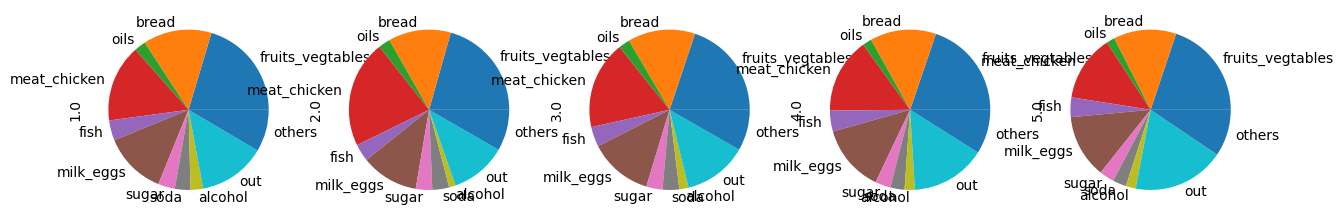

In [198]:
periferia_ready.T.plot.pie(subplots=True, figsize=(15, 5), legend=False)